## Q1. What is the mathematical formula for a linear SVM?

In [2]:
'liner svm=w.x+b=0'

'liner svm=w.x+b=0'

# Q2. What is the objective function of a linear SVM?

min(w,b)=||w||/2

## Q3. What is the kernel trick in SVM?

let say we have 1D data by apply svm kernal it tranform data to higher diamenson

# Q4. What is the role of support vectors in SVM Explain with example

suport vectors are nearest data points from hyperplane from both side
the SVM algorithm focuses on finding the optimal hyperplane that maximizes the margin, which is the distance between the hyperplane and the nearest data points from each class. These nearest data points are the support vectors.

The support vectors are the only points can be use to create optimal hyperplne.

The maximaize the support vector distance indicte better clissifier

# Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

Hyperplne: Hyperplane is decision boundry for svm .it looks like best fit line in 2D and in 3D it create hyperplane. 
hyperplane=w.x+b=0

Marginal Plane: Mrginal plnes are create from nearest points from hyperplane from both side if we have binary clf problem

Hard Margin: A hard margin create when all data points are liearly separatable

between tho merginal plane.

Soft Margin: A Soft Margin llow some misclassified points by lck varbles. it is usefull when our data overlaped between classes we can't separate them linearly.In real-word most of time dataset are overlaped 

# Q6. SVM Implementation through Iris dataset.
1. Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
2. Train a linear SVM classifier on the training set and predict the labels for the testing setl
3. Compute the accuracy of the model on the testing setl
4. Plot the decision boundaries of the trained model using two of the featuresl
5. Try different values of the regularisation parameter C and see how it affects the performance of
the model.

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [4]:
data=load_iris()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
x=pd.DataFrame(data.data,columns=data.feature_names)

In [8]:
y=data.target

In [9]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=0)

In [11]:
from sklearn.svm import SVC
svc=SVC()

In [12]:
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9743589743589743


In [56]:
x=x_train.iloc[:,:2]

In [57]:

y=y_train

In [60]:
h = .02
# create a mesh to plot in
x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

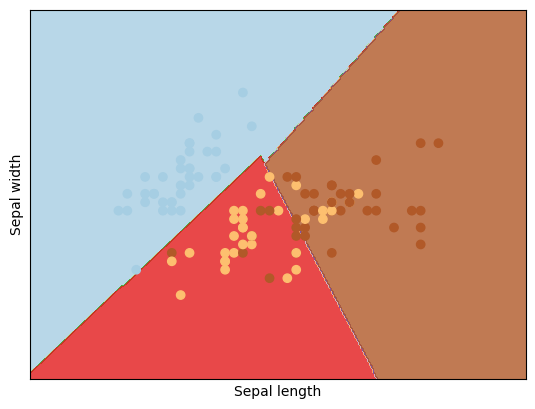

In [65]:
import matplotlib.pyplot as plt
from sklearn import svm


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].


Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
   
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
   

plt.show()

In [66]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}



In [69]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [70]:
grid_search.best_estimator_

SVC(C=1, kernel='linear')

In [71]:
grid_search.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [81]:
svc=SVC(C=1,gamma='scale',kernel='linear')
svc.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [82]:
y_pred=svc.predict(x_test)


In [83]:
accuracy_score(y_test,y_pred)

0.9743589743589743